In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['figure.figsize'] = [4, 4]

### Define a grid of points

We'll evaluate our model on each one of these so we can get a picture of what it's doing

In [3]:
n_grid = 42
x_mesh = np.linspace(-1, 2, n_grid)
y_mesh = np.linspace(-1, 2, n_grid)
X_grid, Y_grid = np.meshgrid(x_mesh, y_mesh)
grid_points = np.stack([X_grid.flatten(), Y_grid.flatten()]).T

#
plt.scatter(grid_points[:,0], grid_points[:,1], s=4)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

NameError: name 'np' is not defined

In [11]:
# Define our activation function

def step(z):
    z = np.array(z)
    return (z >= 0).astype(int)

In [10]:
def perceptron(x, w, b):
    return step(np.dot(w, x) + b )

In [124]:
perceptron(np.array([0.5,2]), np.array([3,1]), -4)

0

### Calculate and visualize the predictions of the Perceptron

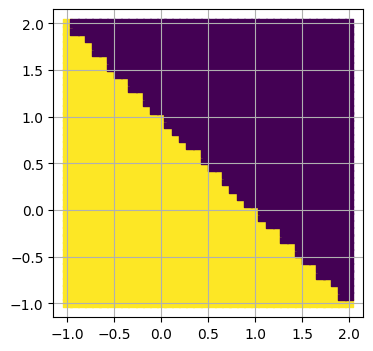

In [139]:
preds = [perceptron(point, np.array([-1,-1]), 1) for point in grid_points]

plt.scatter(grid_points[:,0], grid_points[:,1], c=preds, marker='s')
# plt.colorbar()
plt.grid()
plt.show()

In [186]:
def MLP(x):
    neuron_1 = perceptron(x, [1,0], 0)
    neuron_2 = perceptron(x, [0,1], 0)
    neuron_3 = perceptron(x, [-1,-1], 1)

    output = perceptron(np.array([neuron_1, neuron_2, neuron_3]), np.array([1,1,1]), -2.5)
    return output

    # return step(neuron_1 + neuron_2 + neuron_3 - 2.5)

### Calculate and visualize the predictions of the MLP

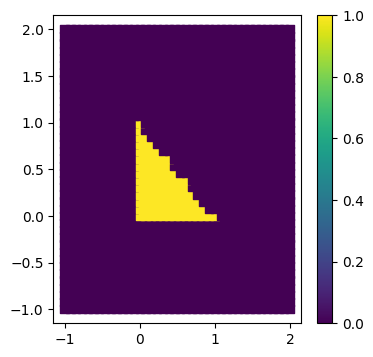

In [166]:
MLP_preds = [MLP(point) for point in grid_points]

plt.scatter(grid_points[:,0], grid_points[:,1], c=MLP_preds, marker='s')
plt.colorbar()
plt.show()

After class I was thinking about Femhi's comment and realized it would be very simple to implement:

Here I sample a bunch of angles between 0 and 360 (evenly spaced out with linspace), and I create a neuron with a decsion boundary with a normal of that angle. I then sum up all of these in one final neuron which gives them all equal weight (averaging their outputs) and is biased not to "fire" unless they are all on. This only happens inside the region.

I've made the function below take an argument for how many neurons to use. This is very normal to do, the only thing that's weird here is that I know exactly what I want the weights and biases to be...

In [15]:
def circle_MLP(x, n_hidden=50):
    angles = np.linspace(0, np.pi*2, n_hidden+1)[:-1]
    neurons = [perceptron(x, np.array([np.sin(theta), np.cos(theta)]), 1) for theta in angles]

    output = perceptron(np.array(neurons), np.ones(n_hidden)/n_hidden, -.999)
    return output

I redefine my grid so my shape is now centered

In [16]:
n_grid = 100
x_mesh = np.linspace(-2, 2, n_grid)
y_mesh = np.linspace(-2, 2, n_grid)
X_grid, Y_grid = np.meshgrid(x_mesh, y_mesh)
grid_points = np.stack([X_grid.flatten(), Y_grid.flatten()]).T

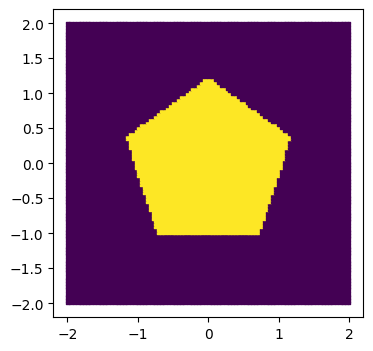

In [22]:
n_hidden = 5 # <-- play with this! Making it large approximates a perfect circle.
circle_MLP_preds = [circle_MLP(point, n_hidden) for point in grid_points]

plt.scatter(grid_points[:,0], grid_points[:,1], c=circle_MLP_preds, marker='s', s=3)
plt.show()